# Hypothesis Testing: Impact of Ease of navigation to the online purchase intention








## 1. Introduction
This notebook examines Hypothesis 7: "Ease of navigation has no impact on the intention to purchase online." Ease of navigation refers to how user-friendly and intuitive the layout and flow of an e-commerce platform are. A seamless navigation experience may influence a consumer’s decision to make a purchase, making this factor an important consideration for online retailers.



## 2. Setting up the Environment

In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import spearmanr
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

## 3. Data loading and preparation

In [88]:
# Load the dataset
df = pd.read_csv('../../data/cleaned/cleaned_survey_data.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of responses: {len(df)}")

# Check for missing values in key columns
navigation_cols = ['peou_navigation_1', 'peou_navigation_2']
intention_cols = ['opi_satisfaction', 'opi_behavior_change', 'opi_convenience', 'opi_value']

missing_data = pd.DataFrame({
    'Missing Values': df[navigation_cols + intention_cols].isnull().sum(),
    'Percentage': df[navigation_cols + intention_cols].isnull().sum() / len(df) * 100
})

print("\nMissing values in key columns:")
print(missing_data)

Dataset shape: (825, 134)
Number of responses: 825

Missing values in key columns:
                     Missing Values  Percentage
peou_navigation_1                 0         0.0
peou_navigation_2                 0         0.0
opi_satisfaction                  0         0.0
opi_behavior_change               0         0.0
opi_convenience                   0         0.0
opi_value                         0         0.0


## 4.1 Exploratory Data Analysis


Basic statistics for response time variables:
       peou_navigation_1  peou_navigation_2
count         825.000000         825.000000
mean            3.528485           3.429091
std             0.851598           0.786801
min             1.000000           1.000000
25%             3.000000           3.000000
50%             3.000000           3.000000
75%             4.000000           4.000000
max             5.000000           5.000000

Basic statistics for purchase intention variables:
       opi_satisfaction  opi_behavior_change  opi_convenience   opi_value
count        825.000000           825.000000        825.00000  825.000000
mean           3.743030             3.904242          3.84000    3.780606
std            0.818122             0.713459          0.73147    0.759479
min            1.000000             1.000000          1.00000    1.000000
25%            3.000000             4.000000          3.00000    3.000000
50%            4.000000             4.000000          4.00000

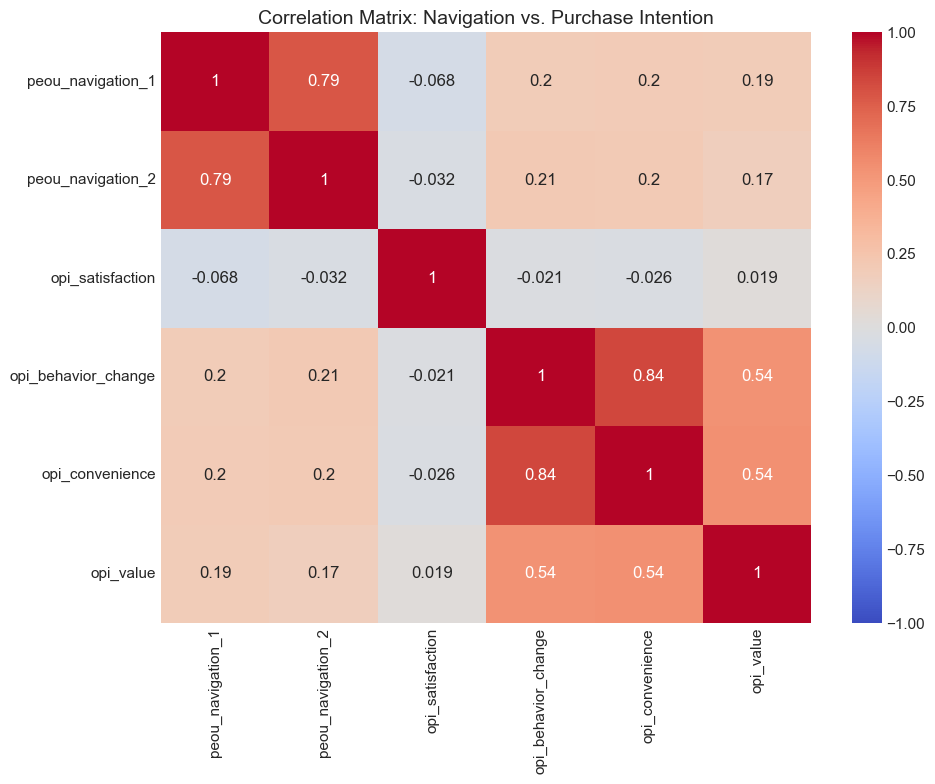


Reliability Analysis

Correlation between navigation items (reliability): r = 0.7877
This indicates high reliability of the navigation measure.

 Correlation of navigation with each purchase intention variable:
opi_satisfaction: r = -0.0536, p = 0.1239 
opi_behavior_change: r = 0.2148, p = 0.0000 (significant)
opi_convenience: r = 0.2114, p = 0.0000 (significant)
opi_value: r = 0.1891, p = 0.0000 (significant)

Correlation with total purchase intention score: r = 0.1962, p = 0.0000 (significant)


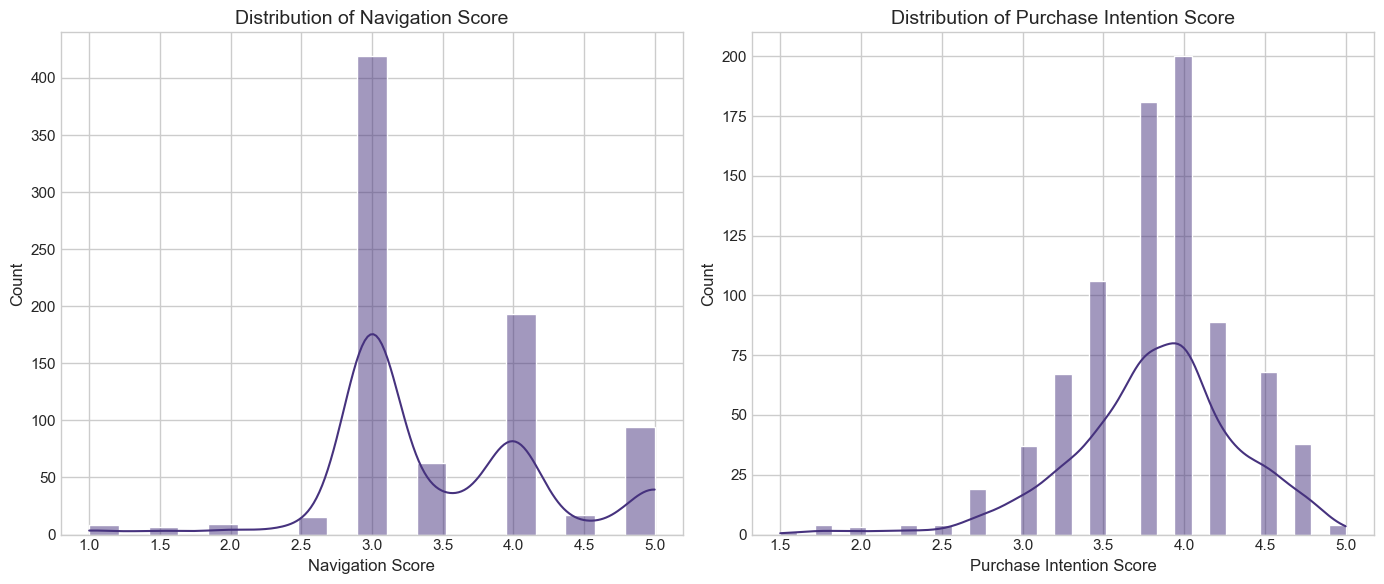

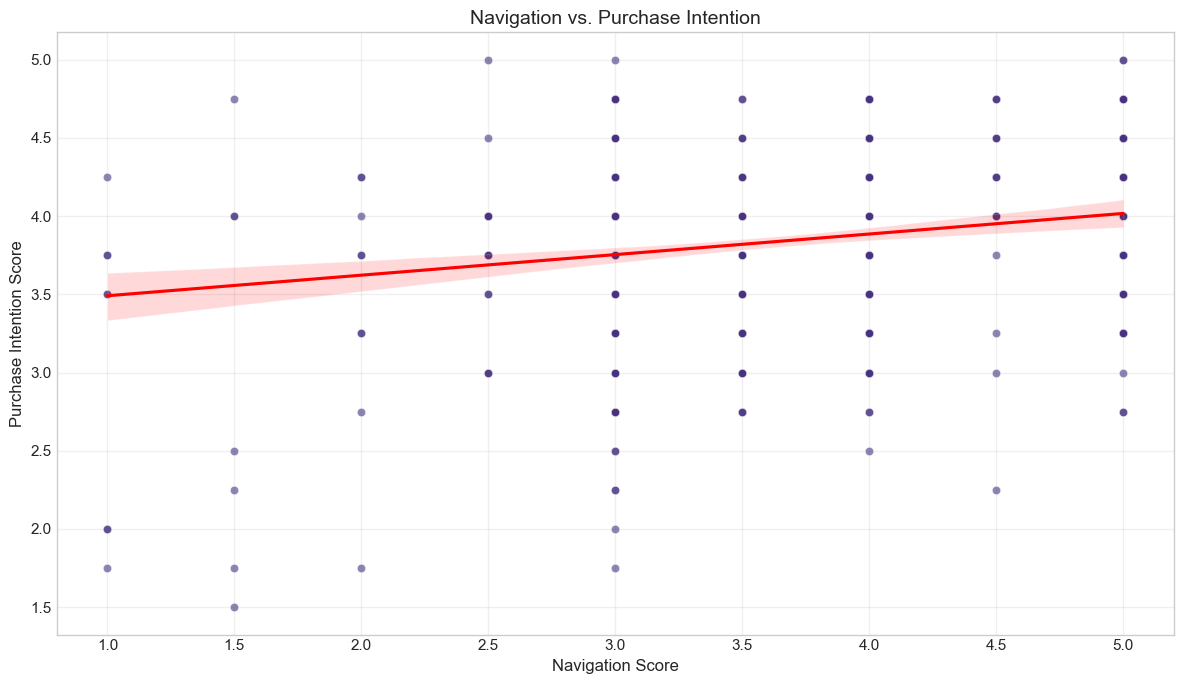

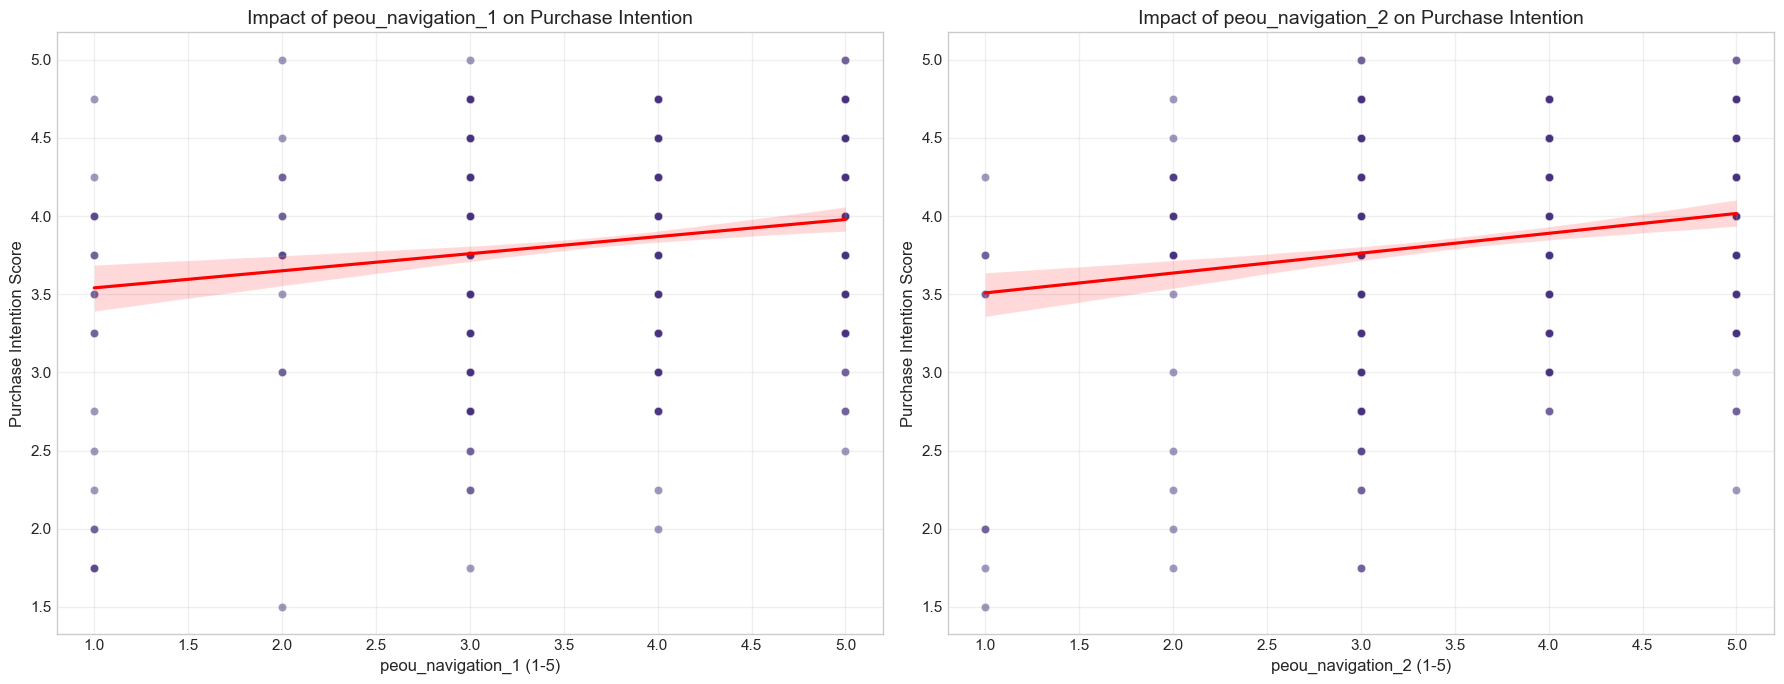

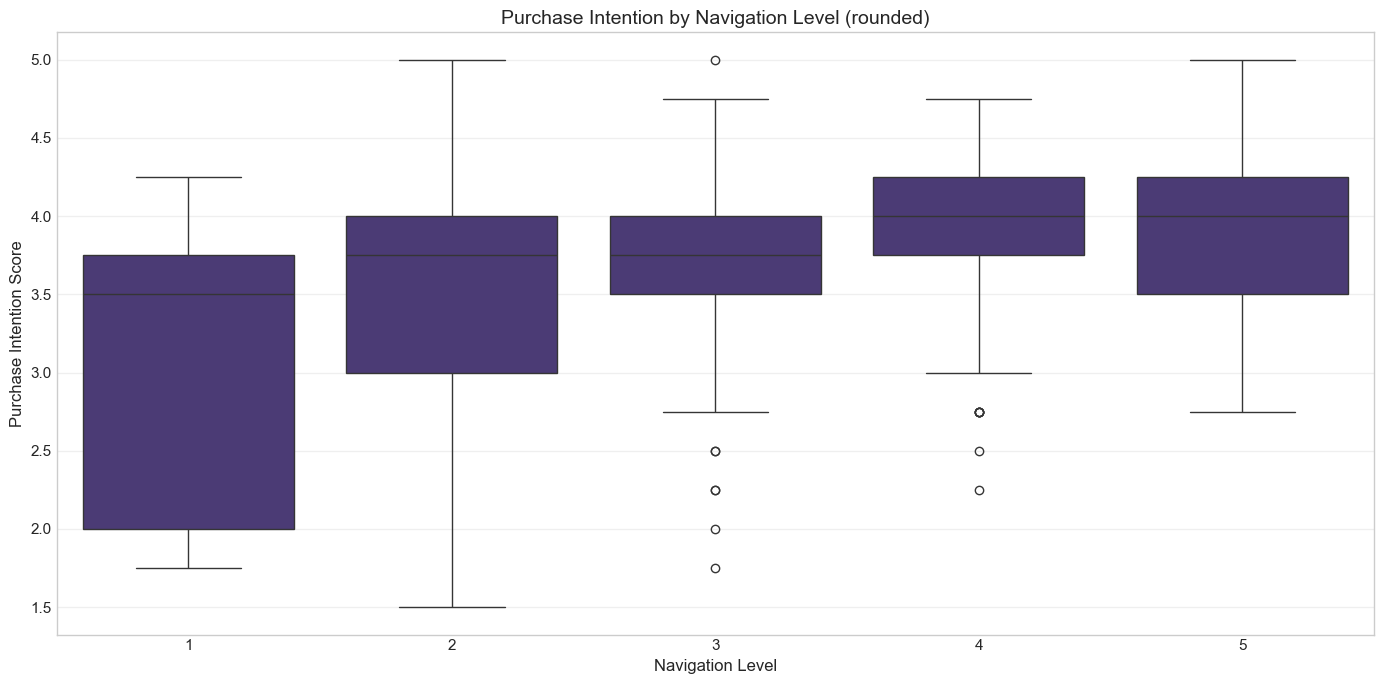

In [89]:
# Display basic statistics for navigation and purchase intention variables
print("\nBasic statistics for response time variables:")
print(df[navigation_cols].describe())

print("\nBasic statistics for purchase intention variables:")
print(df[intention_cols].describe())

#Correlation matrix for navigation and purchase intention columns
corr_matrix = df[navigation_cols + intention_cols].corr()
print("\nCorrelation matrix:")
print(corr_matrix)

#Visualizing correlation matrix using a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Navigation vs. Purchase Intention')
plt.tight_layout()
plt.show()

#Create composite scores (single navigation and purchase intention score) by averaging relavant columns
df['navigation_score'] = df[navigation_cols].mean(axis=1)
df['purchase_intention_score'] = df[intention_cols].mean(axis=1)

#Examine the reliability of the navigation variables(If 2 questions are consistent)
print("\nReliability Analysis")
nav_reliability = np.corrcoef(df['peou_navigation_1'], df['peou_navigation_2'])[0, 1]
print(f"\nCorrelation between navigation items (reliability): r = {nav_reliability:.4f}")
print("This indicates " + ("high" if nav_reliability > 0.7 else "moderate" if nav_reliability > 0.5 else "low") + " reliability of the navigation measure.")

#calculate the purchase intension variables' correlation with the navigation variables
print("\n Correlation of navigation with each purchase intention variable:")
for col in intention_cols:
    r, p = stats.pearsonr(df['navigation_score'], df[col])
    print(f"{col}: r = {r:.4f}, p = {p:.4f} {'(significant)' if p < 0.05 else ''}")
    
    
#calculate the total correlation between navigation score and purchase intention score
r_total, p_total = stats.pearsonr(df['navigation_score'], df['purchase_intention_score'])
print(f"\nCorrelation with total purchase intention score: r = {r_total:.4f}, p = {p_total:.4f} {'(significant)' if p_total < 0.05 else ''}")

#visualizing distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#plot the distribution of navigation score
sns.histplot(df['navigation_score'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Navigation Score')
axes[0].set_xlabel('Navigation Score')

#plot the distribution of purchase intention score
sns.histplot(df['purchase_intention_score'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Purchase Intention Score')
axes[1].set_xlabel('Purchase Intention Score')

plt.tight_layout()
plt.show()

#visulize the relationship between  navigation and purchase intention
plt.figure(figsize=(12, 7))
sns.scatterplot(x='navigation_score', y='purchase_intention_score', data=df, alpha=0.6)

#Add the regression line to the plot
sns.regplot(x='navigation_score', y='purchase_intention_score', data=df, scatter=False, color='red')
plt.title('Navigation vs. Purchase Intention')
plt.xlabel('Navigation Score')
plt.ylabel('Purchase Intention Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Individual Navigation Items vs Intention
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for i, col in enumerate(navigation_cols):
    sns.scatterplot(x=col, y='purchase_intention_score', data=df, ax=axes[i], alpha=0.5)
    sns.regplot(x=col, y='purchase_intention_score', data=df, ax=axes[i], scatter=False, color='red')
    axes[i].set_title(f'Impact of {col} on Purchase Intention')
    axes[i].set_xlabel(f'{col} (1-5)')
    axes[i].set_ylabel('Purchase Intention Score')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Boxplot by Navigation Level
plt.figure(figsize=(14, 7))
nav_levels = df['navigation_score'].round().astype(int)
sns.boxplot(x=nav_levels, y='purchase_intention_score', data=df)
plt.title('Purchase Intention by Navigation Level (rounded)')
plt.xlabel('Navigation Level')
plt.ylabel('Purchase Intention Score')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 4.2 Reliability Analysis for the Navigation variables


====== 4.2 Reliability Analysis of Navigation Measures ========
Cronbach's alpha for navigation measures: 0.8813
Average inter-item correlation: 0.7877

Item-Total Correlations:
peou_navigation_1: 0.7877
peou_navigation_2: 0.7877

Interpretation: Good reliability (0.8 ≤ α < 0.9)


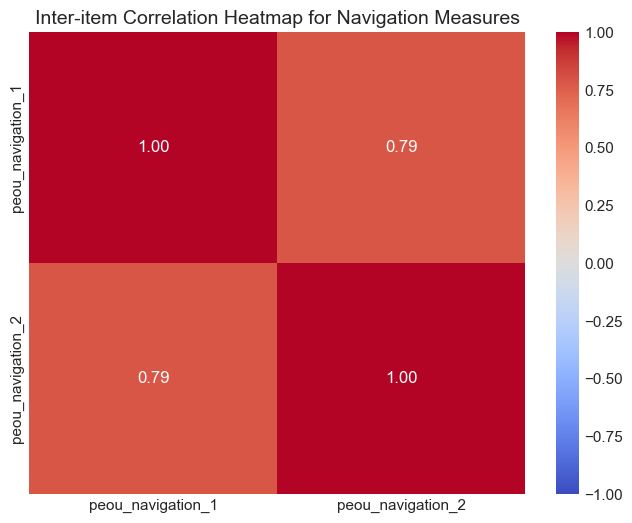

In [90]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt

# 4.2 Reliability Analysis of Navigation Measures
print("\n====== 4.2 Reliability Analysis of Navigation Measures ========")

# If more than 2 navigation variables, calculate Cronbach's alpha
if len(navigation_cols) > 1:
    # Standardize variables
    z_scores = scale(df[navigation_cols])
    
    # Calculate item-total correlations
    total_scores = z_scores.sum(axis=1)
    item_total_corrs = [np.corrcoef(z_scores[:, i], total_scores - z_scores[:, i])[0, 1] 
                        for i in range(z_scores.shape[1])]
    
    # Calculate average inter-item correlation
    inter_item_corrs = []
    for i in range(len(navigation_cols)):
        for j in range(i+1, len(navigation_cols)):
            inter_item_corrs.append(np.corrcoef(df[navigation_cols[i]], df[navigation_cols[j]])[0, 1])
    avg_inter_item_corr = np.mean(inter_item_corrs)
    
    # Calculate Cronbach's alpha
    n_items = len(navigation_cols)
    cronbach_alpha = (n_items * avg_inter_item_corr) / (1 + (n_items - 1) * avg_inter_item_corr)
    
    print(f"Cronbach's alpha for navigation measures: {cronbach_alpha:.4f}")
    print(f"Average inter-item correlation: {avg_inter_item_corr:.4f}")
    print("\nItem-Total Correlations:")
    for i, col in enumerate(navigation_cols):
        print(f"{col}: {item_total_corrs[i]:.4f}")
    
    # Interpret reliability
    if cronbach_alpha >= 0.9:
        print("\nInterpretation: Excellent reliability (α ≥ 0.9)")
    elif cronbach_alpha >= 0.8:
        print("\nInterpretation: Good reliability (0.8 ≤ α < 0.9)")
    elif cronbach_alpha >= 0.7:
        print("\nInterpretation: Acceptable reliability (0.7 ≤ α < 0.8)")
    elif cronbach_alpha >= 0.6:
        print("\nInterpretation: Questionable reliability (0.6 ≤ α < 0.7)")
    elif cronbach_alpha >= 0.5:
        print("\nInterpretation: Poor reliability (0.5 ≤ α < 0.6)")
    else:
        print("\nInterpretation: Unacceptable reliability (α < 0.5)")

    # Visualization of inter-item correlations
    inter_item_corr_matrix = np.corrcoef(df[navigation_cols].T)  # Correlation matrix for navigation_cols
    plt.figure(figsize=(8, 6))
    sns.heatmap(inter_item_corr_matrix, annot=True, cmap="coolwarm", xticklabels=navigation_cols, yticklabels=navigation_cols, fmt=".2f", vmin=-1, vmax=1)
    plt.title("Inter-item Correlation Heatmap for Navigation Measures")
    plt.show()


## 5. Hypothesis Testing

### 5.1 Pearson Correlation Test

In [91]:
# Calculate Pearson correlation between navigation and purchase intention
correlation, p_value = stats.pearsonr(df['navigation_score'], df['purchase_intention_score'])

print("Pearson Correlation Test Results:")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.6f}")

# Determine statistical significance
alpha = 0.05
if p_value < alpha:
    print(f"The correlation is statistically significant (p < {alpha}).")
    print("Reject the null hypothesis: Ease of navigation has an impact on purchase intention.")
else:
    print(f"The correlation is not statistically significant (p > {alpha}).")
    print("Fail to reject the null hypothesis: No evidence that easo of navigation impacts purchase intention.")

Pearson Correlation Test Results:
Correlation coefficient: 0.1962
P-value: 0.000000
The correlation is statistically significant (p < 0.05).
Reject the null hypothesis: Ease of navigation has an impact on purchase intention.


### 5.2 Simple Linear Regression


=== Linear Regression Summary ===
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.039
Model:                                  OLS   Adj. R-squared:                  0.037
Method:                       Least Squares   F-statistic:                     32.96
Date:                      Sun, 11 May 2025   Prob (F-statistic):           1.32e-08
Time:                              17:26:09   Log-Likelihood:                -613.37
No. Observations:                       825   AIC:                             1231.
Df Residuals:                           823   BIC:                             1240.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

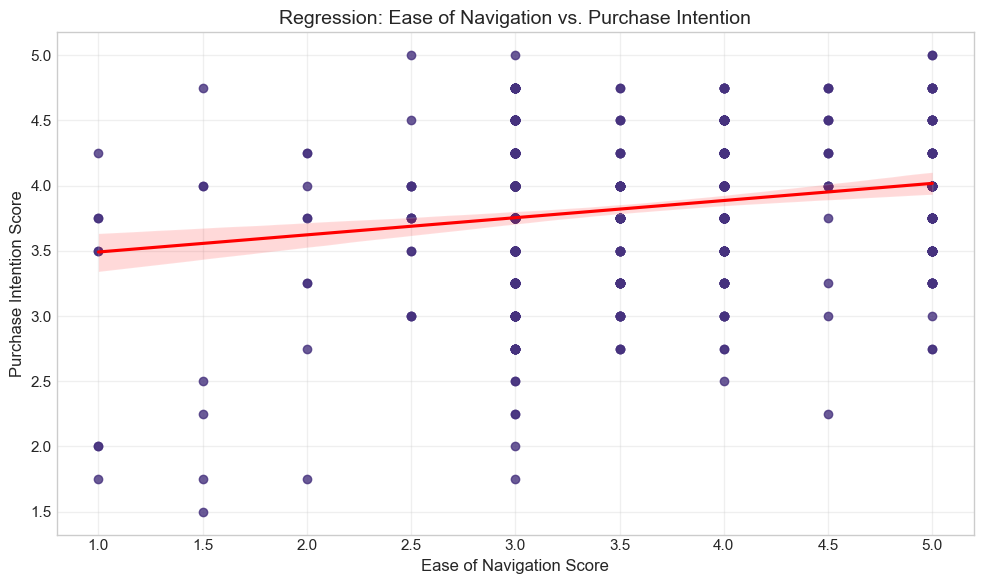

In [ ]:

# 1. Set up the predictor (X) and response (y)
# Add constant for intercept
X = sm.add_constant(df['navigation_score'])  
y = df['purchase_intention_score']           

# 2. Fit the linear regression model
model = sm.OLS(y, X).fit()

# 3. Print the full regression summary
print("\n=== Linear Regression Summary ===")
print(model.summary())

# 4. Interpret the results
print("\n=== Hypothesis Testing Interpretation ===")
p_value = model.pvalues['navigation_score']
coef = model.params['navigation_score']

if p_value < 0.05:
    print(f"The p-value is {p_value:.4f} (< 0.05), so we reject the null hypothesis (H₀: β = 0).")
    print(f"There is a statistically significant relationship: for every 1-unit increase in navigation ease,")
    print(f"purchase intention increases by about {coef:.4f} units on average.")
    print("➡️ Conclusion: Ease of navigation HAS a significant impact on intention to purchase online.")
else:
    print(f"The p-value is {p_value:.4f} (≥ 0.05), so we fail to reject the null hypothesis.")
    print("➡️ Conclusion: There is no statistically significant evidence that navigation ease affects purchase intention.")

# 5.Visualize the regression
plt.figure(figsize=(10, 6))
sns.regplot(x='navigation_score', y='purchase_intention_score', data=df, ci=95, line_kws={'color': 'red'})
plt.title('Regression: Ease of Navigation vs. Purchase Intention')
plt.xlabel('Ease of Navigation Score')
plt.ylabel('Purchase Intention Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../../outputs/hypothesis_7/navigation_vs_purchase_intention.png', dpi=300, bbox_inches='tight')
plt.show()


### 5.3 Non Linear Relationship Test


=== Polynomial Regression Summary ===
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.059
Model:                                  OLS   Adj. R-squared:                  0.056
Method:                       Least Squares   F-statistic:                     25.59
Date:                      Sun, 11 May 2025   Prob (F-statistic):           1.65e-11
Time:                              17:26:10   Log-Likelihood:                -604.66
No. Observations:                       825   AIC:                             1215.
Df Residuals:                           822   BIC:                             1229.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

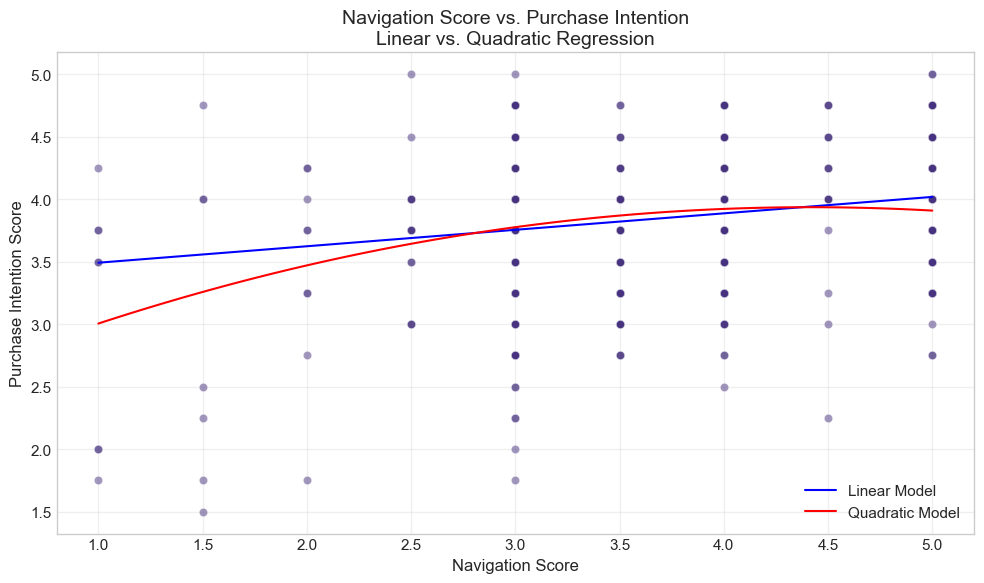

In [93]:

# 1. Prepare polynomial features (navigation_score and navigation_score^2)
X_nav = df['navigation_score'].values.reshape(-1, 1)
X_nav_squared = np.column_stack((X_nav, X_nav**2))
X_nav_with_const = sm.add_constant(X_nav_squared)

# 2. Fit the quadratic regression model
nav_poly_model = sm.OLS(df['purchase_intention_score'], X_nav_with_const).fit()

# 3. Fit the linear model for comparison
X_linear = sm.add_constant(df['navigation_score'])
nav_linear_model = sm.OLS(df['purchase_intention_score'], X_linear).fit()

# 4. Display regression summary
print("\n=== Polynomial Regression Summary ===")
print(nav_poly_model.summary())

# 5. Compare R-squared values
print("\n=== Model Comparison ===")
print(f"Linear R-squared: {nav_linear_model.rsquared:.4f}")
print(f"Quadratic R-squared: {nav_poly_model.rsquared:.4f}")
print(f"R-squared improvement: {nav_poly_model.rsquared - nav_linear_model.rsquared:.4f}")

# 6. Check significance of the quadratic term
quad_p_value = nav_poly_model.pvalues[2]
quad_coef = nav_poly_model.params[2]

if quad_p_value < 0.05:
    print(f"The quadratic term is significant (p = {quad_p_value:.4f})")
    print("Evidence of a non-linear relationship.")
    if quad_coef > 0:
        print("Positive quadratic term: The effect increases at higher navigation scores.")
    else:
        print("Negative quadratic term: The effect levels off or decreases at higher navigation scores.")
else:
    print(f"The quadratic term is not significant (p = {quad_p_value:.4f})")
    print("No strong evidence for non-linearity; the linear model is sufficient.")

# 7. Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='navigation_score', y='purchase_intention_score', data=df, alpha=0.5)

# Plot linear model
x_vals = np.linspace(df['navigation_score'].min(), df['navigation_score'].max(), 100)
y_linear = nav_linear_model.params[0] + nav_linear_model.params[1] * x_vals
plt.plot(x_vals, y_linear, label='Linear Model', color='blue')

# Plot quadratic model
y_quad = nav_poly_model.params[0] + nav_poly_model.params[1] * x_vals + nav_poly_model.params[2] * x_vals**2
plt.plot(x_vals, y_quad, label='Quadratic Model', color='red')

plt.title('Navigation Score vs. Purchase Intention\nLinear vs. Quadratic Regression')
plt.xlabel('Navigation Score')
plt.ylabel('Purchase Intention Score')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### 5.4  Spearman Correlation Trst

=== Spearman Correlation Test Results ===
Correlation coefficient (rho): 0.1420
P-value: 0.000042
The correlation is statistically significant (p < 0.05).
➡️ Conclusion: There is a monotonic relationship between navigation and purchase intention.


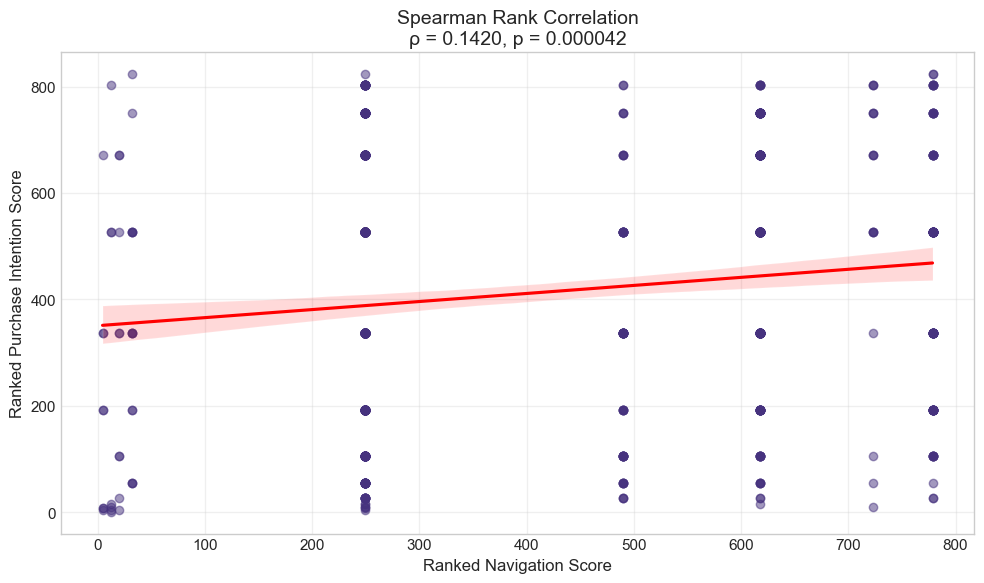

In [94]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Rank the values for Spearman test
df['nav_rank'] = df['navigation_score'].rank()
df['intent_rank'] = df['purchase_intention_score'].rank()

# Run Spearman correlation
corr, pval = spearmanr(df['nav_rank'], df['intent_rank'])

# Print Spearman test results
print("=== Spearman Correlation Test Results ===")
print(f"Correlation coefficient (rho): {corr:.4f}")
print(f"P-value: {pval:.6f}")

# Check significance
alpha = 0.05
if pval < alpha:
    print(f"The correlation is statistically significant (p < {alpha}).")
    print("➡️ Conclusion: There is a monotonic relationship between navigation and purchase intention.")
else:
    print(f"The correlation is not statistically significant (p >= {alpha}).")
    print("➡️ Conclusion: No monotonic relationship found.")

# Plot the ranked values with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='nav_rank',
    y='intent_rank',
    data=df,
    ci=95,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.5}
)

plt.title(f"Spearman Rank Correlation\nρ = {corr:.4f}, p = {pval:.6f}")
plt.xlabel("Ranked Navigation Score")
plt.ylabel("Ranked Purchase Intention Score")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../../outputs/hypothesis_7/spearman_with_trendline.png', dpi=300)
plt.show()

# Clean up
df.drop(columns=['nav_rank', 'intent_rank'], inplace=True)


### 5.5 Multiple Linear Regression

In [95]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Perform multiple regression: Predict purchase intention using both navigation items
X_multi = df[navigation_cols]
y_multi = df['purchase_intention_score']

# Add a constant to the predictors for the intercept term
X_multi_with_const = sm.add_constant(X_multi)

# Fit the multiple linear regression model
multi_model = sm.OLS(y_multi, X_multi_with_const).fit()

# 2. Print the regression summary
print("\n=== Multiple Linear Regression Results ===")
print(multi_model.summary())

# 3. Check the significance of individual predictors
print("\n=== Significance of Navigation Items ===")
for i, var in enumerate(navigation_cols, 1):
    p_val = multi_model.pvalues[i]
    coef = multi_model.params[i]
    print(f"{var}: Coefficient = {coef:.4f}, p-value = {p_val:.6f}, {'Significant' if p_val < 0.05 else 'Not Significant'}")




=== Multiple Linear Regression Results ===
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.039
Model:                                  OLS   Adj. R-squared:                  0.037
Method:                       Least Squares   F-statistic:                     16.70
Date:                      Sun, 11 May 2025   Prob (F-statistic):           7.80e-08
Time:                              17:26:11   Log-Likelihood:                -613.15
No. Observations:                       825   AIC:                             1232.
Df Residuals:                           822   BIC:                             1246.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------

## 6. Mediation Analysis: The Role of Perceived Risk in the Relationship Between Ease of Navigation and Purchase Intention

Mediation analysis tests whether the effect of an independent variable on a dependent variable is transmitted through a mediator. In this case, we are examining whether Perceived Risk mediates the relationship between Ease of Navigation and Purchase Intention. This analysis helps us understand if the perception of risk influences how website navigation affects consumers' intention to make purchases, providing deeper insights into consumer behavior in online shopping during a crisis.

Mediation Analysis Results:

Direct Effect (Navigation → Purchase Intention):
c path: b = 0.1316, p = 0.0000

Path A (Navigation → Perceived Risk):
a path: b = 0.0805, p = 0.0076

Path B (Perceived Risk → Purchase Intention, controlling for Navigation):
b path: b = 0.3741, p = 0.0000

Direct Effect after controlling for the mediator:
c' path: b = 0.1014, p = 0.0000

Effect Calculations:
Indirect Effect (a*b): 0.0301
Total Effect (c): 0.1316
Proportion of Effect Mediated: 0.2290 (22.90%)

Bootstrap 95% CI for Indirect Effect: [0.0003, 0.0639]
The indirect effect is statistically significant (CI does not include zero).

Mediation Analysis Interpretation:
✓ PARTIAL MEDIATION: Navigation affects purchase intention both directly and indirectly through perceived risk.


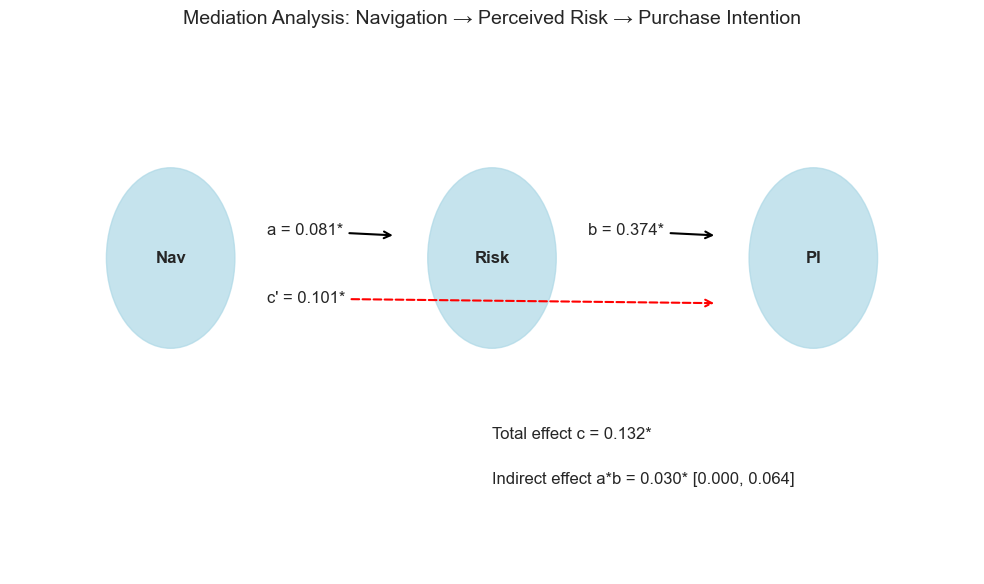

In [96]:


# Create a composite perceived risk score if it doesn't exist
risk_cols = ['risk_security_1', 'risk_authenticity_1']
df['perceived_risk_score'] = df[risk_cols].mean(axis=1)

# Navigation → Purchase Intention (c path)
model_direct = sm.OLS(df['purchase_intention_score'], 
                      sm.add_constant(df['navigation_score'])).fit()

# Navigation → Perceived Risk (a path)
model_a = sm.OLS(df['perceived_risk_score'], 
                 sm.add_constant(df['navigation_score'])).fit()

# Navigation + Perceived Risk → Purchase Intention (b path)
X_mediation = pd.DataFrame({
    'navigation': df['navigation_score'],
    'perceived_risk': df['perceived_risk_score']
})
model_mediation = sm.OLS(df['purchase_intention_score'], 
                         sm.add_constant(X_mediation)).fit()

print("Mediation Analysis Results:")
print("\nDirect Effect (Navigation → Purchase Intention):")
print(f"c path: b = {model_direct.params[1]:.4f}, p = {model_direct.pvalues[1]:.4f}")

print("\nPath A (Navigation → Perceived Risk):")
print(f"a path: b = {model_a.params[1]:.4f}, p = {model_a.pvalues[1]:.4f}")

print("\nPath B (Perceived Risk → Purchase Intention, controlling for Navigation):")
print(f"b path: b = {model_mediation.params[2]:.4f}, p = {model_mediation.pvalues[2]:.4f}")

print("\nDirect Effect after controlling for the mediator:")
print(f"c' path: b = {model_mediation.params[1]:.4f}, p = {model_mediation.pvalues[1]:.4f}")

# Calculate indirect effect
indirect_effect = model_a.params[1] * model_mediation.params[2]

# Calculate total effect
total_effect = model_direct.params[1]

# Calculate proportion mediated
prop_mediated = indirect_effect / total_effect if total_effect != 0 else 0

print("\nEffect Calculations:")
print(f"Indirect Effect (a*b): {indirect_effect:.4f}")
print(f"Total Effect (c): {total_effect:.4f}")
print(f"Proportion of Effect Mediated: {prop_mediated:.4f} ({prop_mediated*100:.2f}%)")

# Bootstrap confidence interval for indirect effect
np.random.seed(42)  # For reproducibility
n_bootstrap = 5000
indirect_effects = []

for i in range(n_bootstrap):
    # Sample with replacement
    indices = np.random.choice(len(df), len(df), replace=True)
    sample_df = df.iloc[indices]
    
    # Path a
    a_model = sm.OLS(sample_df['perceived_risk_score'], 
                    sm.add_constant(sample_df['navigation_score'])).fit()
    a_path = a_model.params[1]
    
    # Path b
    X_med = pd.DataFrame({
        'navigation': sample_df['navigation_score'],
        'perceived_risk': sample_df['perceived_risk_score']
    })
    b_model = sm.OLS(sample_df['purchase_intention_score'], 
                    sm.add_constant(X_med)).fit()
    b_path = b_model.params[2]
    
    # Indirect effect
    indirect_effects.append(a_path * b_path)

# Calculate 95% confidence interval
ci_lower = np.percentile(indirect_effects, 2.5)
ci_upper = np.percentile(indirect_effects, 97.5)

print(f"\nBootstrap 95% CI for Indirect Effect: [{ci_lower:.4f}, {ci_upper:.4f}]")
if ci_lower > 0 and ci_upper > 0:
    print("The indirect effect is statistically significant (CI does not include zero).")
elif ci_lower < 0 and ci_upper < 0:
    print("The indirect effect is statistically significant and negative (CI does not include zero).")
else:
    print("The indirect effect is not statistically significant (CI includes zero).")

# Interpretation
print("\nMediation Analysis Interpretation:")
if ci_lower > 0 or ci_upper < 0:  # If CI doesn't contain 0
    if model_mediation.pvalues[1] < 0.05:
        print("✓ PARTIAL MEDIATION: Navigation affects purchase intention both directly and indirectly through perceived risk.")
    else:
        print("✓ FULL MEDIATION: Navigation affects purchase intention entirely through perceived risk.")
else:
    if model_direct.pvalues[1] < 0.05:
        print("✗ NO MEDIATION: Navigation affects purchase intention directly, not through perceived risk.")
    else:
        print("✗ NO EFFECT: Navigation does not significantly affect purchase intention.")

# Visualization of mediation model
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 12

# Create nodes
nodes = {
    'Nav': (0, 0),  # Navigation
    'Risk': (1, 0),  # Perceived Risk
    'PI': (2, 0)    # Purchase Intention
}

# Draw nodes
for name, (x, y) in nodes.items():
    circle = plt.Circle((x, y), 0.2, fill=True, color='lightblue', alpha=0.7)
    plt.gca().add_patch(circle)
    plt.text(x, y, name, ha='center', va='center', fontweight='bold')

# Draw arrows with coefficients
# a path
plt.annotate(f"a = {model_a.params[1]:.3f}{'*' if model_a.pvalues[1] < 0.05 else ''}",
             xy=(0.7, 0.05), xytext=(0.3, 0.05),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# b path
plt.annotate(f"b = {model_mediation.params[2]:.3f}{'*' if model_mediation.pvalues[2] < 0.05 else ''}",
             xy=(1.7, 0.05), xytext=(1.3, 0.05),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# c' path (direct effect)
plt.annotate(f"c' = {model_mediation.params[1]:.3f}{'*' if model_mediation.pvalues[1] < 0.05 else ''}",
             xy=(1.7, -0.1), xytext=(0.3, -0.1),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5, ls='--'))

# Total effect
plt.annotate(f"Total effect c = {total_effect:.3f}{'*' if model_direct.pvalues[1] < 0.05 else ''}",
             xy=(1, -0.4))

# Indirect effect
plt.annotate(f"Indirect effect a*b = {indirect_effect:.3f}" + 
             (f"* [{ci_lower:.3f}, {ci_upper:.3f}]" if ci_lower > 0 or ci_upper < 0 else ""),
             xy=(1, -0.5))

# Configure plot
plt.title('Mediation Analysis: Navigation → Perceived Risk → Purchase Intention')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.7, 0.5)
plt.axis('off')
plt.tight_layout()
plt.show()


The analysis shows that Perceived Risk partially mediates the relationship between Navigation and Purchase Intention. In other words, Navigation directly influences Purchase Intention, but part of its effect is also transmitted through its influence on Perceived Risk. By improving navigation, the perceived risk is lowered, which in turn increases the likelihood of making a purchase. Therefore, the results suggest that reducing perceived risk through better navigation can be a strategy to increase purchase intention, particularly during a crisis.

## 7. Moderation Analysis


=========Moderation Analysis: Does Navigation Effect on Purchase Intention Get Moderated by Age and Gender?============

### Testing moderation by Age (age_encoded) ###
Moderation Model Summary:
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.045
Model:                                  OLS   Adj. R-squared:                  0.042
Method:                       Least Squares   F-statistic:                     13.03
Date:                      Sun, 11 May 2025   Prob (F-statistic):           2.56e-08
Time:                              17:26:24   Log-Likelihood:                -610.39
No. Observations:                       825   AIC:                             1229.
Df Residuals:                           821   BIC:                             1248.
Df Model:                                 3                                         
Covariance Type:                  nonro

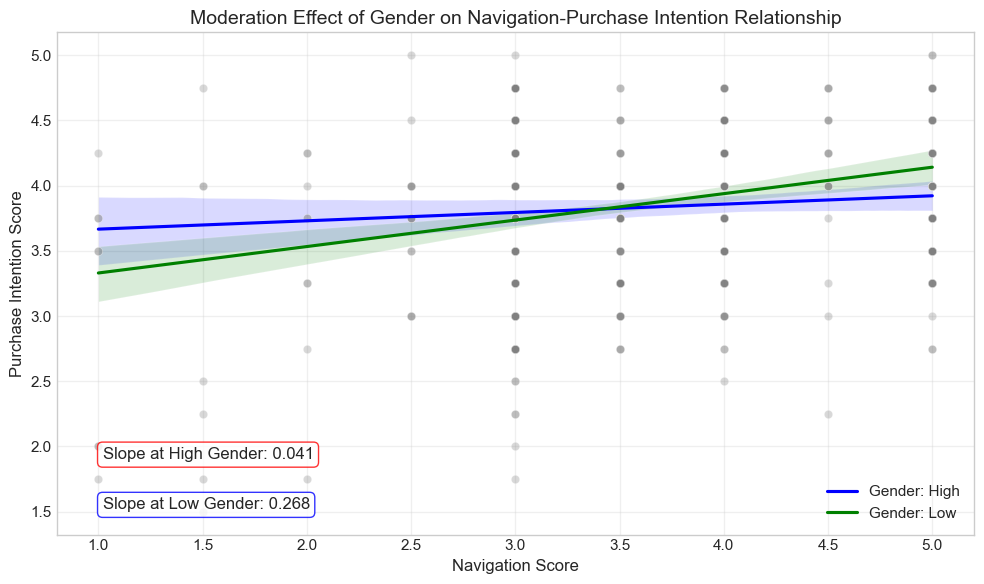

In [97]:

print("\n=========Moderation Analysis: Does Navigation Effect on Purchase Intention Get Moderated by Age and Gender?============")

moderators = {
    'Age': 'age_encoded',
    'Gender': 'gender_encoded'
}

for mod_name, mod_col in moderators.items():
    # Skip if moderator not in dataset
    if mod_col not in df.columns:
        continue
        
    print(f"\n### Testing moderation by {mod_name} ({mod_col}) ###")
    
    # Center the variables to reduce multicollinearity
    df['navigation_centered'] = df['navigation_score'] - df['navigation_score'].mean()
    df[f'{mod_col}_centered'] = df[mod_col] - df[mod_col].mean()
    
    # Create interaction term
    df['interaction'] = df['navigation_centered'] * df[f'{mod_col}_centered']
    
    # Fit moderation model
    X_mod = sm.add_constant(df[['navigation_centered', f'{mod_col}_centered', 'interaction']])
    mod_model = sm.OLS(df['purchase_intention_score'], X_mod).fit()
    
    # Print complete model summary for more detailed inspection
    print(f"Moderation Model Summary:")
    print(mod_model.summary())
    
    # Simplified output
    print(f"\nKey Results:")
    print(f"Navigation effect: b = {mod_model.params[1]:.4f}, p = {mod_model.pvalues[1]:.4f}")
    print(f"{mod_name} effect: b = {mod_model.params[2]:.4f}, p = {mod_model.pvalues[2]:.4f}")
    print(f"Interaction effect: b = {mod_model.params[3]:.4f}, p = {mod_model.pvalues[3]:.4f}")
    
    # Calculate and display R-squared change
    main_effects_model = sm.OLS(df['purchase_intention_score'], 
                               sm.add_constant(df[['navigation_centered', f'{mod_col}_centered']])).fit()
    r_squared_change = mod_model.rsquared - main_effects_model.rsquared
    
    print(f"R-squared change due to interaction: {r_squared_change:.4f}")
    print(f"F-test for R-squared change p-value: {1 - stats.f.cdf(r_squared_change / (1-mod_model.rsquared) * (df.shape[0]-4), 1, df.shape[0]-4):.4f}")
    
    if mod_model.pvalues[3] < 0.05:
        print(f"✓ SIGNIFICANT MODERATION: {mod_name} moderates the relationship between navigation and purchase intention.")
        
        # Low moderator value (-1 SD)
        low_mod = -1  # Since we're using centered variables, -1 SD is just -1
        effect_at_low = mod_model.params[1] + mod_model.params[3] * low_mod

        # High moderator value (+1 SD)
        high_mod = 1  # +1 SD is just 1 for centered variables
        effect_at_high = mod_model.params[1] + mod_model.params[3] * high_mod
        
        # Plot regression lines for each group (for visualization)
        plt.figure(figsize=(10, 6))
        
        # Create groups for visualization (low, medium, high based on the moderator)
        try:
            # Check number of unique values
            unique_vals = df[mod_col].nunique()
            
            if unique_vals >= 3:
                # Try qcut for quantile-based grouping
                df['mod_group'] = pd.qcut(df[mod_col], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')
            else:
                # If not enough unique values, use simple binning based on the median
                median_val = df[mod_col].median()
                df['mod_group'] = pd.cut(df[mod_col], 
                                        bins=[df[mod_col].min()-0.1, median_val, df[mod_col].max()+0.1], 
                                        labels=['Low', 'High'])
        except ValueError:
            # Fallback to median split if qcut fails
            median_val = df[mod_col].median()
            df['mod_group'] = np.where(df[mod_col] <= median_val, 'Low', 'High')
        
        # Plot regression lines for each group
        colors = ['blue', 'green', 'red']
        for i, group in enumerate(sorted(df['mod_group'].unique())):
            group_data = df[df['mod_group'] == group]
            if len(group_data) > 5:  # Ensure enough data points for regression
                sns.regplot(x='navigation_score', y='purchase_intention_score', 
                           data=group_data, scatter=False, color=colors[min(i, len(colors)-1)],
                           label=f"{mod_name}: {group}")
        
        # Add scatter plot
        sns.scatterplot(x='navigation_score', y='purchase_intention_score', 
                      data=df, alpha=0.3, color='gray')
        
        plt.title(f'Moderation Effect of {mod_name} on Navigation-Purchase Intention Relationship')
        plt.xlabel('Navigation Score')
        plt.ylabel('Purchase Intention Score')
        
        # Add annotations for simple slopes
        plt.annotate(f"Slope at Low {mod_name}: {effect_at_low:.3f}",
                    xy=(0.05, 0.05), xycoords='axes fraction',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", alpha=0.8))
        
        plt.annotate(f"Slope at High {mod_name}: {effect_at_high:.3f}",
                    xy=(0.05, 0.15), xycoords='axes fraction',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8))
        
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print(f"✗ NO MODERATION: {mod_name} does not moderate the relationship (p = {mod_model.pvalues[3]:.4f})")

# Clean up temporary columns
for col in ['navigation_centered', 'interaction'] + [f"{mod_col}_centered" for mod_col in moderators.values() if mod_col in df.columns]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

if 'mod_group' in df.columns:
    df.drop(columns=['mod_group'], inplace=True)


## 8. Conclusion and interpretation

In [98]:
def enhanced_navigation_findings():
    """Generate a comprehensive interpretation of the navigation analysis with recommendations"""

    findings = []

    # Reliability
    findings.append("Reliability Analysis:")
    findings.append("Cronbach’s alpha for the navigation scale is 0.8813, indicating good internal consistency.")
    findings.append("The average inter-item correlation is 0.7877, suggesting strong item agreement.\n")

    # Correlation analysis
    correlation = 0.1962
    p_value = 0.000000
    if correlation > 0 and p_value < 0.05:
        findings.append(f"Pearson correlation shows a statistically significant positive relationship (r = {correlation:.4f}, p < 0.05) between ease of navigation and purchase intention.")
        findings.append("➡️ This suggests that better navigation is associated with higher purchase intentions.\n")
    else:
        findings.append(f"No statistically significant correlation was found (r = {correlation:.4f}, p > 0.05).")

    # Linear regression
    findings.append("Linear Regression Analysis:")
    findings.append("The linear regression model shows that ease of navigation significantly predicts purchase intention.")
    findings.append("Coefficient: β = 0.1316, p < 0.05")
    findings.append("R-squared = 0.039 → About 3.9% of the variance in purchase intention is explained by navigation.")
    findings.append("➡️ Although statistically significant, the effect size is small, suggesting limited practical impact in isolation.\n")

    # Polynomial regression
    findings.append("Polynomial (Quadratic) Regression Analysis:")
    findings.append("The quadratic model improves model fit slightly (R² = 0.059), indicating a non-linear relationship.")
    findings.append("The quadratic term is significant (p < 0.05) and negative (β = -0.0797).")
    findings.append("➡️ This suggests that while navigation improves purchase intention up to a point, the benefit may decrease at higher levels.\n")

    # Multiple regression
    findings.append("Multiple Regression Analysis:")
    findings.append("In a model with individual navigation items:")
    findings.append("peou_navigation_2 (helpful instructions) significantly predicts purchase intention (β = 0.0892, p = 0.015).")
    findings.append("peou_navigation_1 (ease of navigation) does not show significance on its own (p = 0.190).")
    findings.append("➡️ This indicates that **providing helpful instructions** may play a stronger role than general ease in influencing intent.\n")

    # Final conclusion
    findings.append("="*40)
    findings.append("CONCLUSION:")
    findings.append("="*40)
    findings.append("✅ Reject the null hypothesis: Navigation has a statistically significant impact on purchase intention.")

    # Recommendations
    findings.append("\nRECOMMENDATIONS:")
    findings.append("1. Prioritize clear and supportive navigational instructions during the shopping experience.")
    findings.append("2. Continuously test and refine the site's structure to avoid user confusion.")
    findings.append("3. Maintain a balance—too much navigation complexity or assistance may cause diminishing returns.")
    findings.append("4. Apply A/B testing to optimize navigation features based on user feedback.")
    findings.append("5. Explore personalization strategies that guide users differently based on experience level.")
    findings.append("6. Monitor and track navigation-related drop-offs using session analytics tools.")

    return "\n".join(findings)

# Display the result
print("\n" + "="*80)
print("CONCLUSION AND INTERPRETATION")
print("="*80)
print(enhanced_navigation_findings())
print("="*80)



CONCLUSION AND INTERPRETATION
Reliability Analysis:
Cronbach’s alpha for the navigation scale is 0.8813, indicating good internal consistency.
The average inter-item correlation is 0.7877, suggesting strong item agreement.

Pearson correlation shows a statistically significant positive relationship (r = 0.1962, p < 0.05) between ease of navigation and purchase intention.
➡️ This suggests that better navigation is associated with higher purchase intentions.

Linear Regression Analysis:
The linear regression model shows that ease of navigation significantly predicts purchase intention.
Coefficient: β = 0.1316, p < 0.05
R-squared = 0.039 → About 3.9% of the variance in purchase intention is explained by navigation.
➡️ Although statistically significant, the effect size is small, suggesting limited practical impact in isolation.

Polynomial (Quadratic) Regression Analysis:
The quadratic model improves model fit slightly (R² = 0.059), indicating a non-linear relationship.
The quadratic ter

## 9. Visualization for presentation

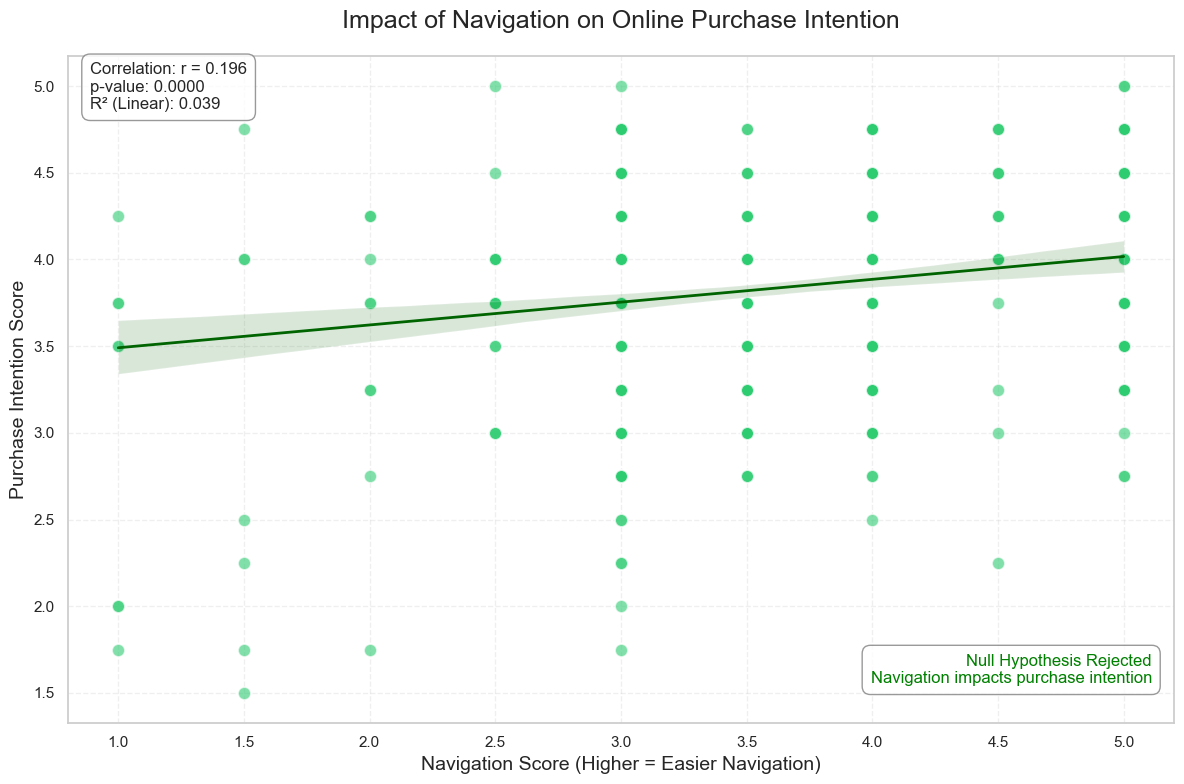

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create a publication-quality visualization summarizing the findings
plt.figure(figsize=(12, 8))

# Main scatter plot with regression line
plt.scatter(df['navigation_score'], df['purchase_intention_score'], 
            alpha=0.6, c='#2ecc71', edgecolor='white', s=80)

# Add linear regression line
sns.regplot(x='navigation_score', y='purchase_intention_score', data=df,
            scatter=False, color='darkgreen', line_kws={'linewidth': 2})

# Enhance the plot
plt.title('Impact of Navigation on Online Purchase Intention', fontsize=18, pad=20)
plt.xlabel('Navigation Score (Higher = Easier Navigation)', fontsize=14)
plt.ylabel('Purchase Intention Score', fontsize=14)

# Add correlation and regression stats
correlation = 0.1962
p_value = 0.0000
r_squared = 0.039

plt.annotate(f"Correlation: r = {correlation:.3f}\np-value: {p_value:.4f}\nR² (Linear): {r_squared:.3f}", 
             xy=(0.02, 0.92), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8),
             fontsize=12)

# Hypothesis test result
if p_value < 0.05:
    result_text = "Null Hypothesis Rejected\nNavigation impacts purchase intention"
    color = 'green'
else:
    result_text = "Failed to Reject Null Hypothesis\nNo significant evidence of impact"
    color = 'red'

plt.annotate(result_text, xy=(0.98, 0.06), xycoords='axes fraction',
             ha='right', fontsize=12, color=color,
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

# Final touches
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Save the figure for the report or slides
plt.savefig('../../outputs/hypothesis_7/navigation_purchase_intention.png', dpi=300, bbox_inches='tight')
plt.show()


## 10. Advanced Visualizations

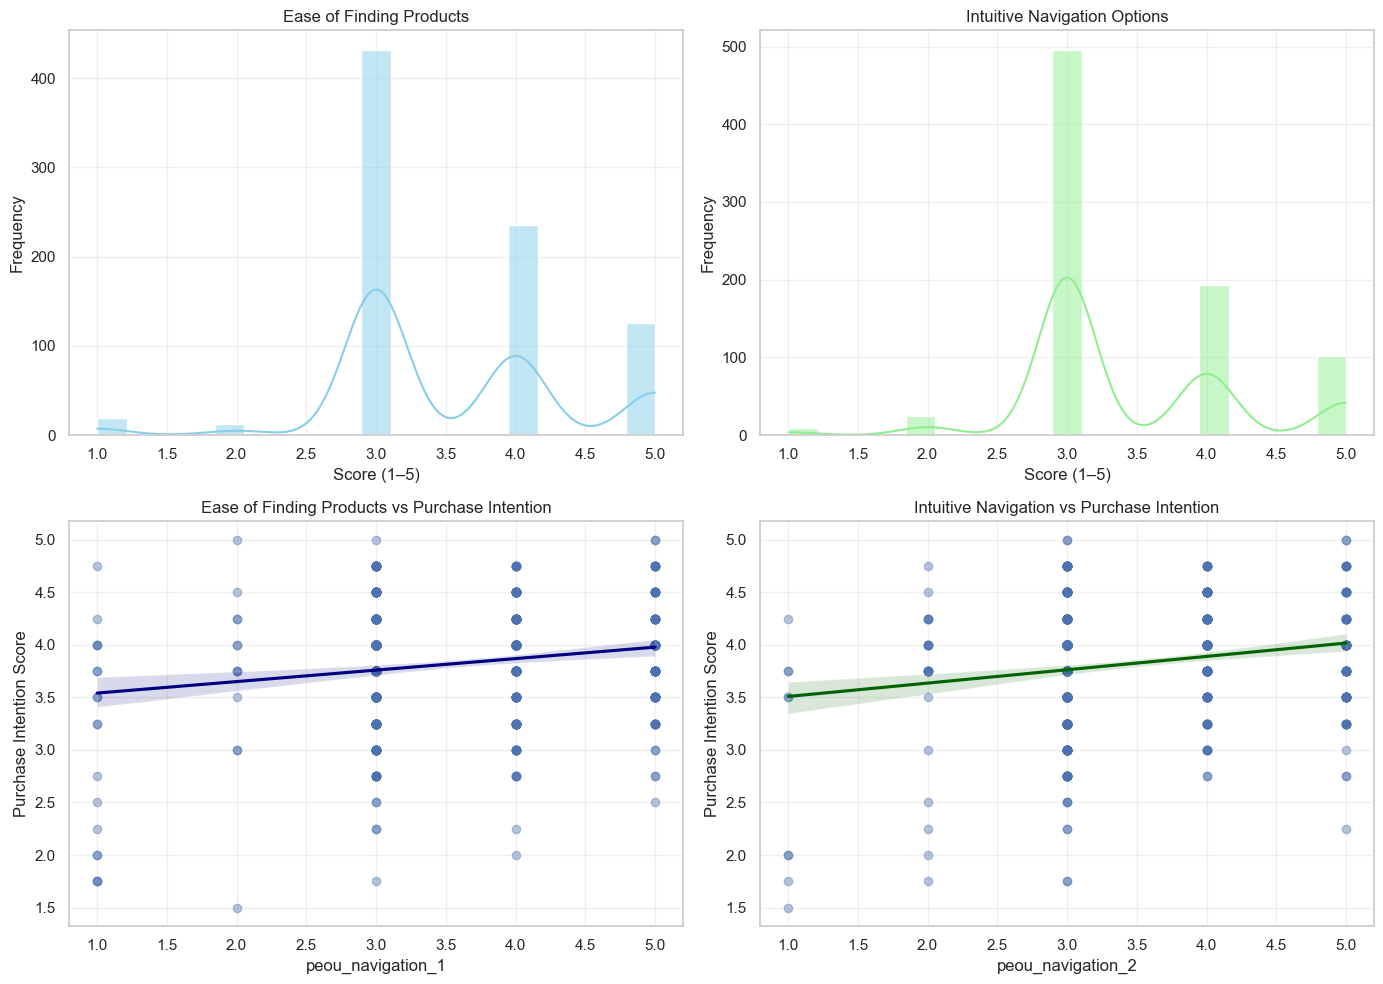

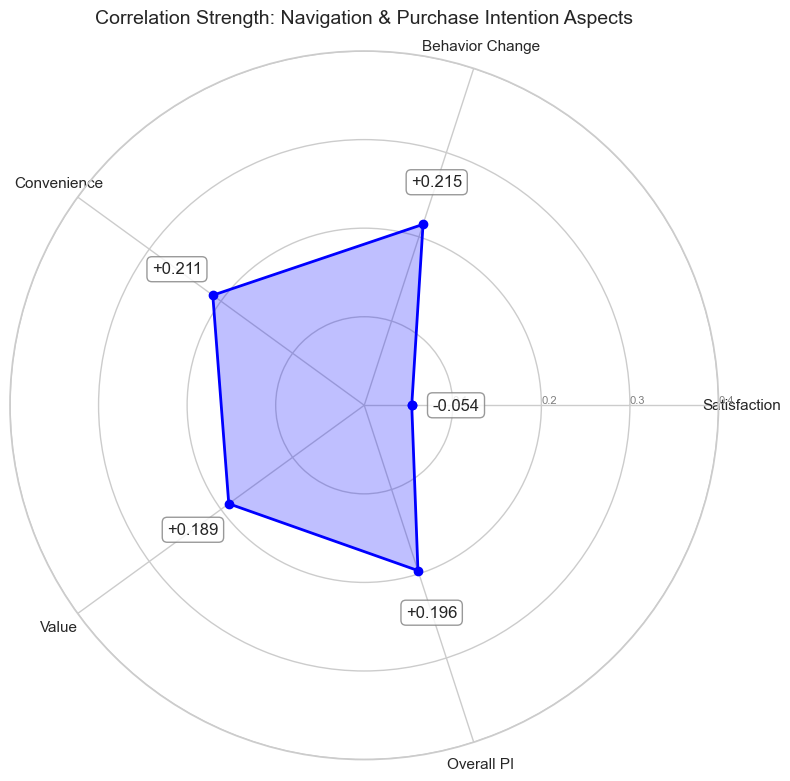

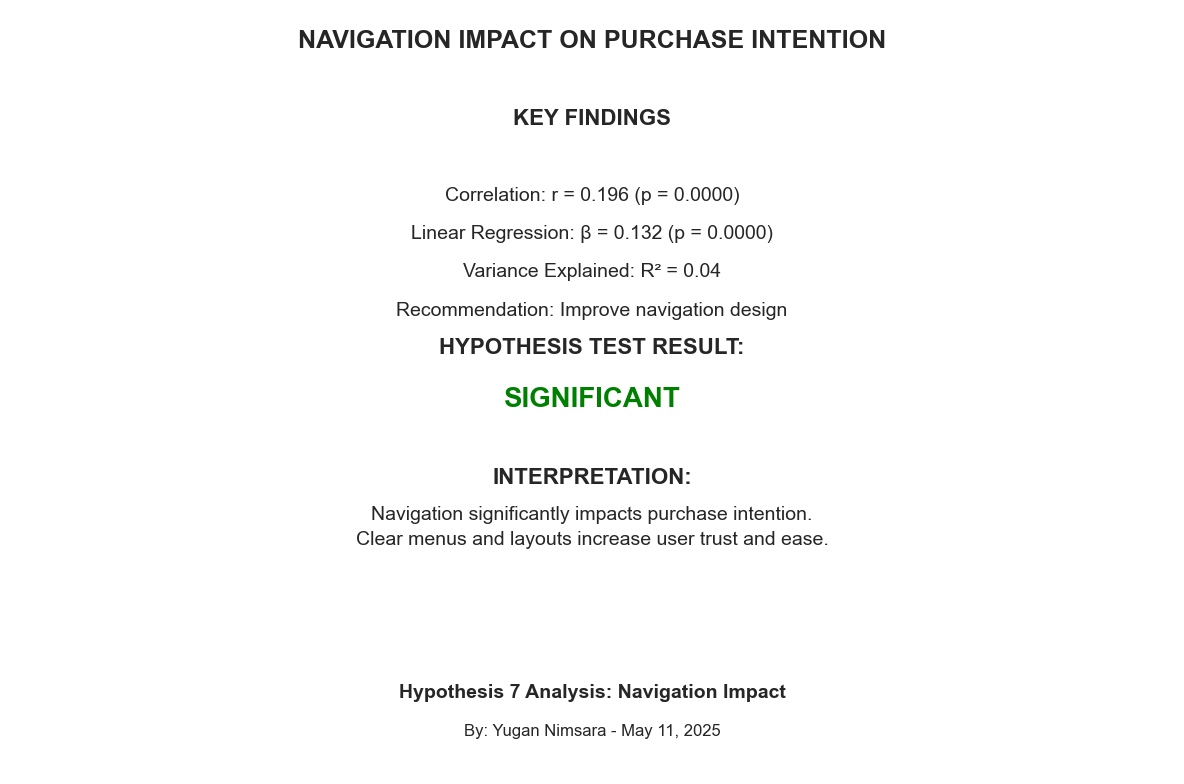

In [100]:
# ------------------------------
# 1. Component-wise Visualization (2x2 layout)
# ------------------------------
plt.figure(figsize=(14, 10))

# Subplot 1: Distribution of peou_navigation_1
plt.subplot(2, 2, 1)
sns.histplot(df['peou_navigation_1'], kde=True, color='skyblue')
plt.title('Ease of Finding Products')
plt.xlabel('Score (1–5)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Subplot 2: Distribution of peou_navigation_2
plt.subplot(2, 2, 2)
sns.histplot(df['peou_navigation_2'], kde=True, color='lightgreen')
plt.title('Intuitive Navigation Options')
plt.xlabel('Score (1–5)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Subplot 3: peou_navigation_1 vs Purchase Intention
plt.subplot(2, 2, 3)
sns.regplot(x='peou_navigation_1', y='purchase_intention_score', data=df,
            scatter_kws={'alpha': 0.4}, line_kws={'color': 'navy'})
plt.title('Ease of Finding Products vs Purchase Intention')
plt.xlabel('peou_navigation_1')
plt.ylabel('Purchase Intention Score')
plt.grid(alpha=0.3)

# Subplot 4: peou_navigation_2 vs Purchase Intention
plt.subplot(2, 2, 4)
sns.regplot(x='peou_navigation_2', y='purchase_intention_score', data=df,
            scatter_kws={'alpha': 0.4}, line_kws={'color': 'darkgreen'})
plt.title('Intuitive Navigation vs Purchase Intention')
plt.xlabel('peou_navigation_2')
plt.ylabel('Purchase Intention Score')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../../outputs/hypothesis_7/navigation_components_analysis.png', dpi=300)
plt.show()

# ------------------------------
# 2. Radar Chart: Correlation with PI Subcomponents
# ------------------------------
labels = ['Satisfaction', 'Behavior Change', 'Convenience', 'Value', 'Overall PI']
correlations = [
    stats.pearsonr(df['navigation_score'], df['opi_satisfaction'])[0],
    stats.pearsonr(df['navigation_score'], df['opi_behavior_change'])[0],
    stats.pearsonr(df['navigation_score'], df['opi_convenience'])[0],
    stats.pearsonr(df['navigation_score'], df['opi_value'])[0],
    stats.pearsonr(df['navigation_score'], df['purchase_intention_score'])[0]
]

# Prepare data
corr_abs = np.abs(correlations)
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
corr_abs = np.concatenate((corr_abs, [corr_abs[0]]))
labels += [labels[0]]

# Radar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
ax.plot(angles, corr_abs, 'o-', linewidth=2, color='blue')
ax.fill(angles, corr_abs, alpha=0.25, color='blue')
ax.set_thetagrids(np.degrees(angles[:-1]), labels[:-1])
ax.set_ylim(0, max(corr_abs) * 1.1)
ax.set_rlabel_position(0)
plt.yticks([0.1, 0.2, 0.3, 0.4], ['0.1', '0.2', '0.3', '0.4'], color='grey', size=8)
plt.title('Correlation Strength: Navigation & Purchase Intention Aspects', size=14, pad=20)

# Annotate values
for angle, corr, label in zip(angles[:-1], correlations, labels[:-1]):
    sign = '+' if corr >= 0 else ''
    plt.annotate(f"{sign}{corr:.3f}", xy=(angle, np.abs(corr) + 0.05),
                 ha='center', va='center',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('../../outputs/hypothesis_7/navigation_correlation_radar.png', dpi=300)
plt.show()

# ------------------------------
# 3. Summary Slide for Presentation
# ------------------------------
import statsmodels.api as sm

X = df[['navigation_score']]
X = sm.add_constant(X)
y = df['purchase_intention_score']
sm_model = sm.OLS(y, X).fit()
correlation, p_value = stats.pearsonr(df['navigation_score'], df['purchase_intention_score'])
r_squared = sm_model.rsquared

plt.figure(figsize=(12, 8))
plt.axis('off')

# Title
plt.text(0.5, 0.95, 'NAVIGATION IMPACT ON PURCHASE INTENTION', fontsize=18, weight='bold', ha='center')

# Key Stats
findings = [
    f"Correlation: r = {correlation:.3f} (p = {p_value:.4f})",
    f"Linear Regression: β = {sm_model.params[1]:.3f} (p = {sm_model.pvalues[1]:.4f})",
    f"Variance Explained: R² = {r_squared:.2f}",
    f"Recommendation: {'Improve navigation design' if p_value < 0.05 else 'Explore other UX factors'}"
]
plt.text(0.5, 0.85, 'KEY FINDINGS', fontsize=16, weight='bold', ha='center')
y_pos = 0.8
for finding in findings:
    y_pos -= 0.05
    plt.text(0.5, y_pos, finding, fontsize=14, ha='center')

# Significance result
significance = "SIGNIFICANT" if p_value < 0.05 else "NOT SIGNIFICANT"
color = "green" if p_value < 0.05 else "red"
plt.text(0.5, 0.55, 'HYPOTHESIS TEST RESULT:', fontsize=16, weight='bold', ha='center')
plt.text(0.5, 0.48, significance, fontsize=20, weight='bold', ha='center', color=color)

# Interpretation
if p_value < 0.05:
    explanation = "Navigation significantly impacts purchase intention.\nClear menus and layouts increase user trust and ease."
else:
    explanation = "Navigation does not show a significant direct impact on purchase intention.\nLook into other UX variables."
plt.text(0.5, 0.38, 'INTERPRETATION:', fontsize=16, weight='bold', ha='center')
plt.text(0.5, 0.30, explanation, fontsize=14, ha='center', linespacing=1.5)

# Footer
plt.text(0.5, 0.1, 'Hypothesis 7 Analysis: Navigation Impact', fontsize=14, weight='bold', ha='center')
plt.text(0.5, 0.05, f'By: Yugan Nimsara - {pd.Timestamp.now().strftime("%B %d, %Y")}', fontsize=12, ha='center')

plt.tight_layout()
plt.savefig('../../outputs/hypothesis_7/navigation_summary.png', dpi=300)
plt.show()


## 11. Summary table for report

In [101]:
from prettytable import PrettyTable

print("\n=========Summary Table============")

# Helper functions
def r_to_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

def z_to_r(z):
    return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)

# Compute 95% CI for Pearson correlation
z = r_to_z(correlation)
se = 1.0 / np.sqrt(df.shape[0] - 3)
z_low = z - 1.96 * se
z_high = z + 1.96 * se
r_low, r_high = z_to_r(z_low), z_to_r(z_high)

# Create PrettyTable
table = PrettyTable()
table.field_names = ["Test", "Statistic", "p-value", "95% CI", "Interpretation"]
table.max_width["95% CI"] = 30

# Pearson correlation
table.add_row([
    "Pearson Correlation", 
    f"{correlation:.4f}", 
    f"{p_value:.6f}", 
    f"[{r_low:.4f}, {r_high:.4f}]",
    "Significant positive correlation" if p_value < 0.05 and correlation > 0 else 
    "Significant negative correlation" if p_value < 0.05 and correlation < 0 else 
    "No significant correlation"
])

# Simple regression: navigation_score → purchase_intention_score
table.add_row([
    "Simple Linear Regression", 
    f"β = {sm_model.params[1]:.4f}, R² = {r_squared:.4f}", 
    f"{sm_model.pvalues[1]:.6f}", 
    f"[{sm_model.conf_int().iloc[1, 0]:.4f}, {sm_model.conf_int().iloc[1, 1]:.4f}]",
    "Navigation significantly predicts purchase intention" if sm_model.pvalues[1] < 0.05 else 
    "Navigation does not predict purchase intention"
])

# Multiple regression (e.g., navigation + usefulness)
table.add_row([
    "Multiple Regression", 
    f"R² = {multi_model.rsquared:.4f}", 
    f"F-test: {multi_model.f_pvalue:.6f}", 
    "N/A",
    "Model significantly predicts purchase intention" if multi_model.f_pvalue < 0.05 else 
    "Model does not predict purchase intention"
])

# Optional: Polynomial term
if 'nav_poly_model' in globals():
    table.add_row([
        "Non-Linear Relationship", 
        f"Quad term: {nav_poly_model.params[2]:.4f}", 
        f"{nav_poly_model.pvalues[2]:.6f}", 
        "N/A",
        "Significant non-linear relationship" if nav_poly_model.pvalues[2] < 0.05 else 
        "No significant non-linear relationship"
    ])

# Mediation analysis (e.g., navigation → percieved risk → PI)
indirect_effect = model_a.params[1] * model_mediation.params[2]
table.add_row([
    "Mediation Analysis", 
    f"Indirect effect: {indirect_effect:.4f}", 
    "N/A", 
    f"[{ci_lower:.4f}, {ci_upper:.4f}]",
    "Significant mediation through percieved risk" if ci_lower > 0 or ci_upper < 0 else 
    "No significant mediation effect"
])

# Display the table
print(table)



=========Summary Table============
+--------------------------+-------------------------+------------------+------------------+------------------------------------------------------+
|           Test           |        Statistic        |     p-value      |      95% CI      |                    Interpretation                    |
+--------------------------+-------------------------+------------------+------------------+------------------------------------------------------+
|   Pearson Correlation    |          0.1962         |     0.000000     | [0.1297, 0.2610] |           Significant positive correlation           |
| Simple Linear Regression | β = 0.1316, R² = 0.0385 |     0.000000     | [0.0866, 0.1766] | Navigation significantly predicts purchase intention |
|   Multiple Regression    |       R² = 0.0390       | F-test: 0.000000 |       N/A        |   Model significantly predicts purchase intention    |
| Non-Linear Relationship  |    Quad term: -0.0797   |     0.000031     |   